In [1]:
import math
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 添加绘图功能
def plot_data(result, target, result_error, name, show=True):
    group = [[], [], []]
    for i in range(result.shape[0]):
        group[target[i]].append([result[i][0], result[i][1]])
    for i in range(len(group)):
        array = np.array(group[i])
        plt.scatter(array[:, 0], array[:, 1])
    if result_error is not None and len(result_error) != 0:
        plt.scatter(result_error[:, 0], result_error[:, 1])
    plt.title(f"{name} data")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    if show:
        plt.show()
        plt.close()

# 题干
考虑三个正态分布函数$N_1(\mu_1, \Sigma_1)$, $N_2(\mu_2, \Sigma_2)$,$N_3(\mu_3, \Sigma_3)$,具体参数如下:

$$
    \Sigma_1 = \Sigma_2 = \Sigma_3 = \left{[}
        \begin{matrix}
        1.2 & 0.4\\
        0.4 & 1.8
        \end{matrix}
    \right{]}
$$

$$
    \mu_1 =  \left{[}
        \begin{matrix}
        0.1\\
        0.1
        \end{matrix}
    \right{]}\text{ , }
    \mu_2 =  \left{[}
        \begin{matrix}
        2.1\\
        1.9
        \end{matrix}
    \right{]}\text{ , }
    \mu_3 = \left{[}
        \begin{matrix}
        -1.5\\
        2.0
        \end{matrix}
    \right{]}
$$

按照随机样本生成规则为：前两个样本使用 N2 生成，第三个样本使用 N1 生成，第四个样本使用 N3 生成。重复上述规则生成 500 个样本。
随机样本遵循的概率密度函数建模为混合模型如下：
$$
    p(x) = \sum_{i=1}^3 P_i N_i(\mu_i, \Sigma_i)
$$

In [3]:
m1 = np.array([0.1, 0.1])
m2 = np.array([2.1, 1.9])
m3 = np.array([-1.5, 2.0])
COV = np.matrix([[1.2, 0.4],
                 [0.4, 1.8]])

all_mean = [m1, m2, m3]
# 根据均值矢量以及协方差使用正态分布生成数据集函数
def generate_value(means, cov, count=1):
    return np.random.multivariate_normal(means, cov, count)

def generate1():
    """
    第一种生成方法，其核心思想是按照生成规则，顺序生成
    :rtype: 样本
    """
    result = []
    result_target = []
    for i in range(500):
        current_type = i % 4 # 生成规则为4个一组

        if current_type < 2: # 前2个
            result_target.append(1) # 本次代码中会将题目中的数字角标减1，使其从由 [1, 2, 3] -> [0, 1, 2]
        elif current_type == 2: # 第三个
            result_target.append(0)
        else: # 最后一个
            result_target.append(2)
        result.append(generate_value(all_mean[result_target[i]], COV))

    result = np.concatenate(result, axis=0)

    return result, result_target

def generate2():
    """
    第二种生成方式，其为总体生成，即样本生成后其总体数值进行直接生成。
    """
    result = []
    result_target = []
    counts= [125, 250, 125]
    for i in range(3):
        result.append(generate_value(all_mean[i], COV, counts[i]))
        result_target.extend([i] * counts[i])

    result = np.concatenate(result, axis=0)

    return result, result_target

X, y = generate1()

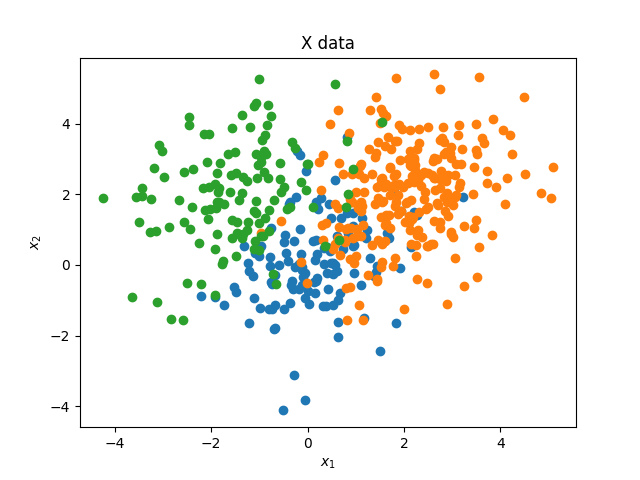

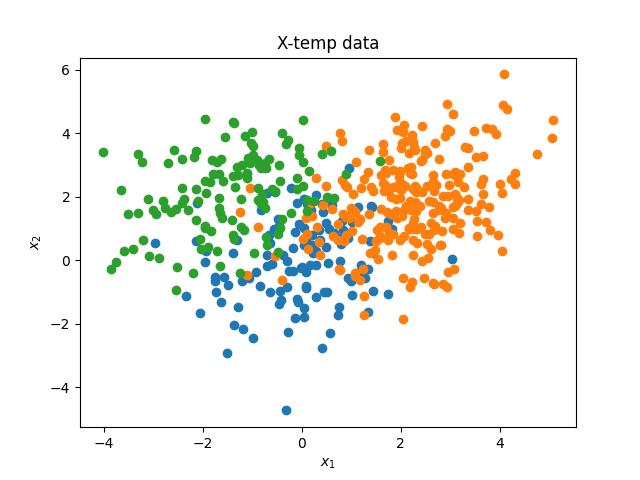

In [4]:
plot_data(result=X, target=y,result_error=None, name='X', show=True)